In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [111]:
dataset = pd.read_csv("covid-19.csv")

In [127]:
data_name = dataset.columns

'日本国内累計罹患者数'

In [112]:
dataset[1:].head()

,日付,日本国内累計罹患者数,日本国内新規罹患者数,北海道,青森県,岩手県,宮城県,秋田県,山形県,福島県,...,愛媛県,高知県,福岡県,佐賀県,長崎県,熊本県,大分県,宮崎県,鹿児島県,沖縄県
1,2020/01/16,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020/01/17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020/01/18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020/01/19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020/01/20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
convert_time = pd.to_datetime(dataset[1:]["日付"], format='%Y/%m/%d')

In [114]:
convert_time

1     2020-01-16
2     2020-01-17
3     2020-01-18
4     2020-01-19
5     2020-01-20
         ...    
133   2020-05-27
134   2020-05-28
135   2020-05-29
136   2020-05-30
137   2020-05-31
Name: 日付, Length: 137, dtype: datetime64[ns]

In [148]:
kansensya = pd.Series(dataset[1:]["日本国内新規罹患者数"],dtype = "float64")

kansensya = kansensya.fillna(0)

print(kansensya.dtype)
kansensya.index = pd.to_datetime(dataset[1:]["日付"], format='%Y/%m/%d')

float64


In [149]:

print(kansensya.index.dtype)
print(kansensya.dtype)

datetime64[ns]
float64


In [150]:
kansensya

日付
2020-01-16     1.0
2020-01-17     0.0
2020-01-18     0.0
2020-01-19     0.0
2020-01-20     0.0
              ... 
2020-05-27    35.0
2020-05-28     0.0
2020-05-29     0.0
2020-05-30     0.0
2020-05-31     0.0
Name: 日本国内新規罹患者数, Length: 137, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0, flags=flags)


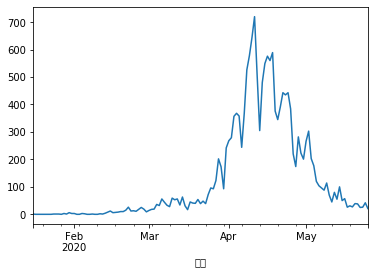

In [151]:
kansensya[:-6].plot()


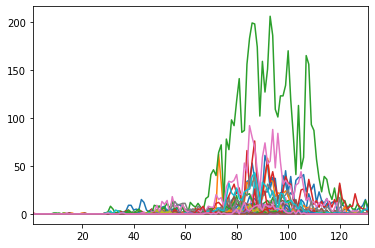

In [146]:
for i in range(len(data_name)-3):
    
    a = pd.Series(dataset[1:][data_name[i+3]],dtype = "float64")
    a = a.fillna(0)
    a[:-6].plot()
    

In [152]:
#kansensya

import statsmodels.api as sm 

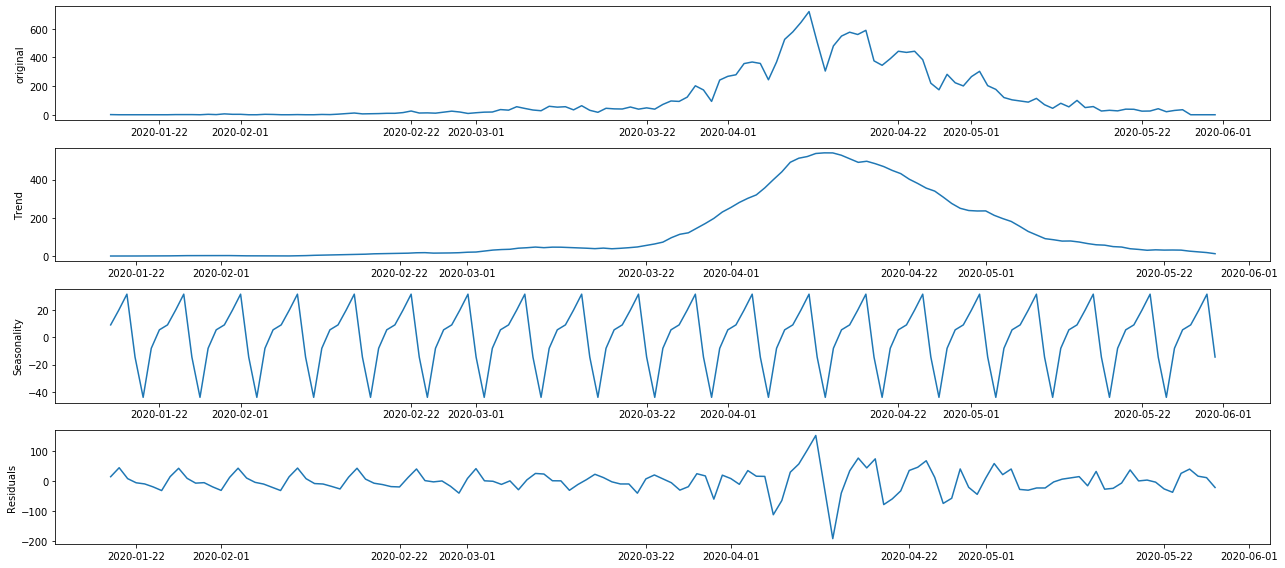

In [156]:
res = sm.tsa.seasonal_decompose(kansensya)

original = kansensya
trend = res.trend
seasonal = res.seasonal
residual = res.resid
plt.figure(figsize = (18,8))

plt.subplot(411)
plt.plot(original)
plt.ylabel("original")


# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(trend)
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(seasonal)
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(residual)
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

In [157]:
kansensya.groupby(kansensya.index.day).mean()

日付
1     137.750000
2     150.000000
3     144.750000
4     146.000000
5     128.000000
6     101.000000
7     127.000000
8     162.000000
9     180.000000
10    193.250000
11    205.000000
12    161.000000
13     99.500000
14    162.750000
15    160.500000
16    131.400000
17    127.600000
18    133.800000
19     90.600000
20     89.600000
21     96.600000
22    108.400000
23    102.400000
24    114.200000
25    102.600000
26     72.400000
27     71.400000
28    101.200000
29     81.200000
30     75.000000
31     81.666667
Name: 日本国内新規罹患者数, dtype: float64

In [159]:
kansensya.groupby(kansensya.index.month).mean()

日付
1      1.062500
2      7.758621
3     64.290323
4    406.433333
5     73.161290
Name: 日本国内新規罹患者数, dtype: float64

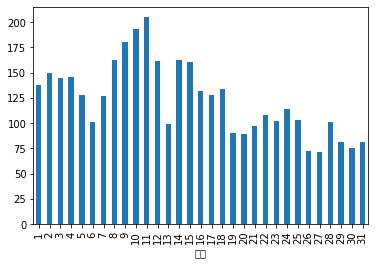

In [161]:
kansensya_day_mean = kansensya.groupby(kansensya.index.day).mean()
kansensya_day_mean.plot(kind="bar")

In [162]:
kansensya_acf = sm.tsa.stattools.acf(kansensya,nlags = 40)

kansensya_acf 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.95032473,  0.89452196,  0.86658218,  0.84189239,
        0.82387132,  0.8345009 ,  0.82414147,  0.75950535,  0.68872546,
        0.64169206,  0.59549818,  0.55248512,  0.53342904,  0.50073042,
        0.42423223,  0.35901407,  0.31044859,  0.25776901,  0.2112376 ,
        0.19102082,  0.15963579,  0.10950483,  0.06210868,  0.01968556,
       -0.02364691, -0.06052002, -0.08050543, -0.09756761, -0.1302554 ,
       -0.15490749, -0.17390881, -0.19603597, -0.21534026, -0.2221849 ,
       -0.234857  , -0.25393776, -0.26816353, -0.27617024, -0.27856495,
       -0.28490587])

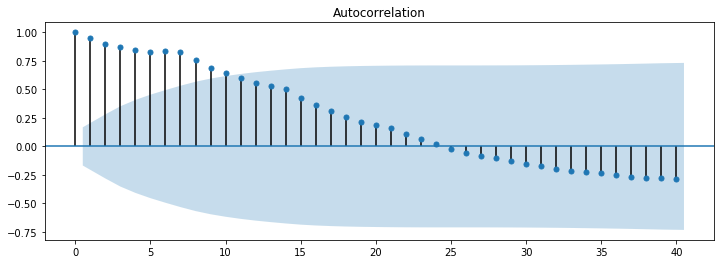

In [164]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_acf(kansensya,lags = 40,ax = ax1)
plt.show()

In [165]:
kansensya_diff = kansensya - kansensya.shift()

In [170]:
kansensya = kansensya_diff.head().dropna()

日付
2020-01-17   -1.0
2020-01-18    0.0
2020-01-19    0.0
2020-01-20    0.0
Name: 日本国内新規罹患者数, dtype: float64

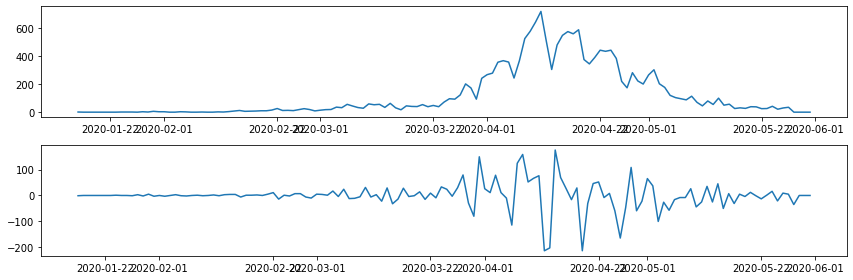

In [172]:
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(211)
plt.plot(kansensya)

ax2 = fig.add_subplot(212)
plt.plot(kansensya_diff)

plt.tight_layout()